# Mordern Applyed Statistics(Chap 11)

### import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 11.1 Visualization methods

### 1) Principal Component analysis

- **Principal Component for the iris data.**

In [2]:
## Iris
from sklearn.datasets import load_iris
iris = load_iris()
ir = pd.DataFrame(data=iris.data, columns=iris.feature_names)
ir_target = iris.target
ir_target_name = iris.target_names

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 평균과 표준편차를 이용한 기본 스케일
std = StandardScaler().fit_transform(np.log(ir))

## PCA
pca = PCA()
ir_pca = pca.fit_transform(std)

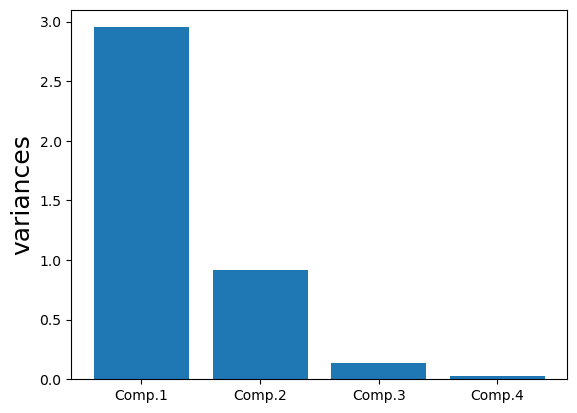

In [4]:
# PCA component에 대한 bar chart
plt.bar(['Comp.1', 'Comp.2', 'Comp.3', 'Comp.4'], pca.explained_variance_)
plt.ylabel('variances', fontsize = 18)
plt.show()

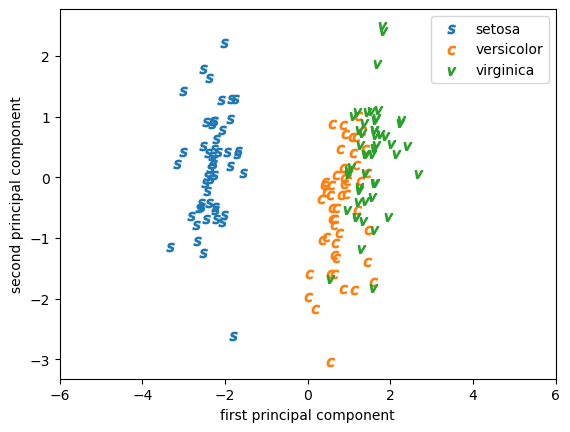

In [5]:
## PCA
pca = PCA(n_components=2)
ir_pca = pca.fit_transform(std)
pca_columns=['Comp1','Comp2']
ir_pca_df = pd.DataFrame(-ir_pca, columns=pca_columns)

## 2개의 component를 이용한 Scatter plot 
markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_pca_df.loc[ir_target==i,:]['Comp1']
    y_axis_data = ir_pca_df.loc[ir_target==i,:]['Comp2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.xlabel('first principal component')
plt.xlim(-6, 6)
plt.ylabel('second principal component')
plt.show()

- **Principal Component for the crabs data.**

In [6]:
## Crabs data
crabs = pd.read_csv("../data/crabs.csv")
lcrabs = np.log(crabs.iloc[:,3:])
lcrabs_target = np.repeat([0,1,2,3], [50]*4, axis = 0)
lcrabs_target_name = np.array(["B","b","O","o"])

In [7]:
lcrabs.head

<bound method NDFrame.head of            FL        RW        CL        CW        BD
0    2.091864  1.902108  2.778819  2.944439  1.945910
1    2.174752  2.041220  2.895912  3.034953  2.001480
2    2.219203  2.054124  2.944439  3.109061  2.041220
3    2.261763  2.066863  3.000720  3.139833  2.104134
4    2.282382  2.079442  3.010621  3.135494  2.104134
..        ...       ...       ...       ...       ...
195  3.063391  2.890372  3.718438  3.832980  2.928524
196  3.077312  2.839078  3.730501  3.854394  2.975530
197  3.086487  2.844909  3.751854  3.858622  2.970414
198  3.113515  2.844909  3.761200  3.885679  2.985682
199  3.139833  3.005683  3.832980  3.960813  3.049273

[200 rows x 5 columns]>

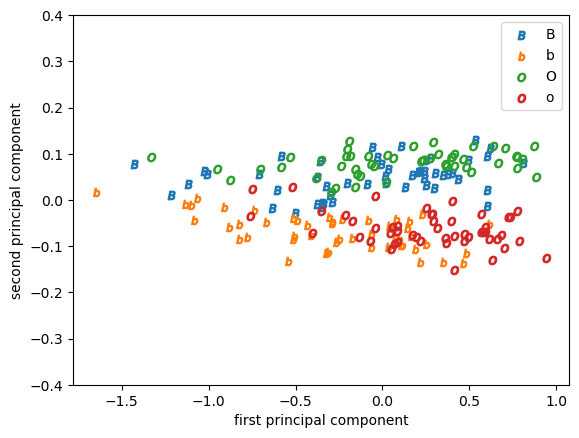

In [8]:
## PCA
pca = PCA(n_components=2)
lcrabs_pca = pca.fit_transform(lcrabs)
pca_columns=['Comp1','Comp2']
lcrabs_pca_df = pd.DataFrame(-lcrabs_pca, columns=pca_columns)

## 2개의 component를 이용한 Scatter plot 
markers=['$B$', '$b$', '$O$', '$o$']
for i, marker in enumerate(markers):
    x_axis_data = lcrabs_pca_df.loc[lcrabs_target==i,:]['Comp1']
    y_axis_data = lcrabs_pca_df.loc[lcrabs_target==i,:]['Comp2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=lcrabs_target_name[i])

plt.legend(loc='upper right')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.ylim(-0.4,0.4)
plt.show()

### 2) Exploratory projection pursuit

In [9]:
# R에서 사용되는 'Xgobi', 'rggobi' 패키지는 파이썬에서 구현할 수 없으므로 생략한다.

### 3) Distance methods

- **Distance-based representations of the iris data**

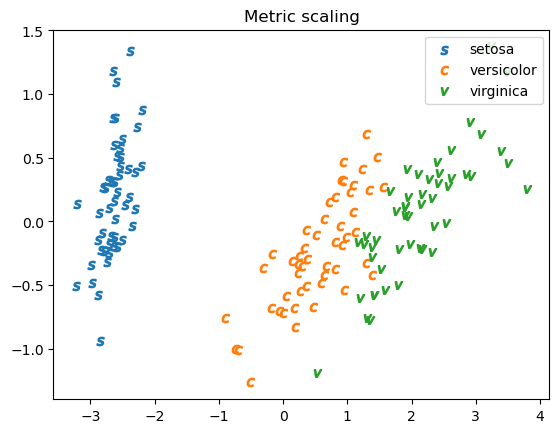

In [10]:
from cmdscale import cmdscale
from scipy.spatial.distance import cdist

## Classical Multidimensional Scaling
y, evals = cmdscale(cdist(ir, ir, 'euclidean'))
columns=['x','y']
ir_cmd_df = pd.DataFrame(y[:,0:2], columns=columns)

markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_cmd_df.loc[ir_target==i,:]['x']
    y_axis_data = ir_cmd_df.loc[ir_target==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.title('Metric scaling')
plt.show()

TolFun exceeded: Optimisation terminated


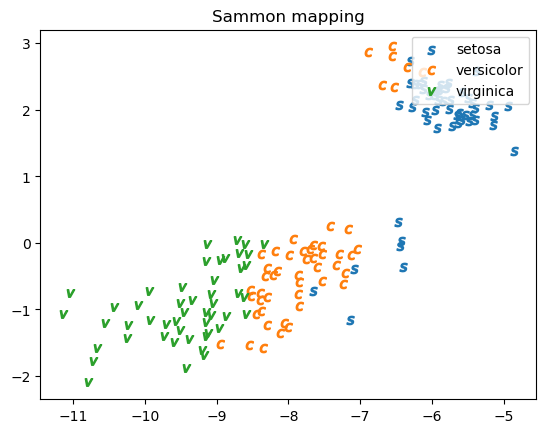

In [11]:
from sammon import sammon

(x,index) = np.unique(iris.data,axis=0,return_index=True)

y, E = sammon(x, n = 2)
y[:,1] = y[:,1]
columns=['x','y']
ir_sammon_df = pd.DataFrame(y, columns=columns)

markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_sammon_df.loc[np.delete(ir_target, 142)==i,:]['x']
    y_axis_data = ir_sammon_df.loc[np.delete(ir_target, 142)==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.title('Sammon mapping')
plt.show()

Unable to determine R home: [WinError 2] 지정된 파일을 찾을 수 없습니다


initial  value 3.024856 
iter   5 value 2.638471
final  value 2.579979 
converged


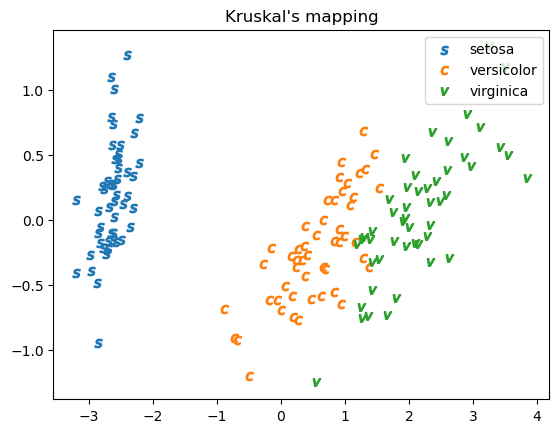

In [12]:
from rpy2.robjects import r

r('library(MASS)')
r('ir <- rbind(iris3[,,1], iris3[,,2], iris3[,,3])')
r('ir.iso <- isoMDS(dist(ir[-143,]))')
ir_iso = r('ir.iso$points')

ir_iso_df = pd.DataFrame({'x':ir_iso[:149], 'y':ir_iso[149:]})

markers=['$s$', '$c$', '$v$']
for i, marker in enumerate(markers):
    x_axis_data = ir_iso_df.loc[np.delete(ir_target, 142)==i,:]['x']
    y_axis_data = ir_iso_df.loc[np.delete(ir_target, 142)==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=ir_target_name[i])

plt.legend(loc='upper right')
plt.title("Kruskal's mapping")
plt.show()

- **Sammon mapping of crabs data**

TolFun exceeded: Optimisation terminated


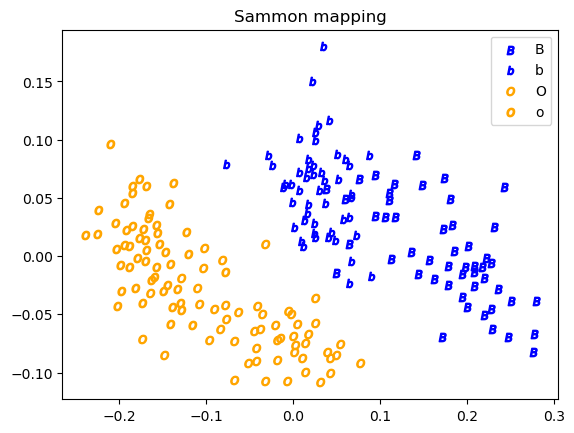

In [13]:
cr_scale = 0.5 * np.log(crabs['CL'] * crabs['CW'])
slcrabs = lcrabs - pd.DataFrame(np.array([cr_scale]*5), index = lcrabs.columns).transpose()
cr_means = np.zeros((2, 5))
cr_means[0,:] = slcrabs[crabs['sex'] == 'F'].mean(axis = 0)
cr_means[1,:] = slcrabs[crabs['sex'] == 'M'].mean(axis = 0)
dslcrabs = slcrabs - cr_means[np.repeat([0,1], [100,100], axis = 0),]

from sammon import sammon

y, E = sammon(dslcrabs, n = 2)
y[:,1] = y[:,1]
mds_columns=['x','y']
lcrabs_sammon_df = pd.DataFrame(y, columns=mds_columns)

markers=['$B$', '$b$', '$O$', '$o$']
for i, marker in enumerate(markers):
    x_axis_data = lcrabs_sammon_df.loc[lcrabs_target==i,:]['x']
    y_axis_data = lcrabs_sammon_df.loc[lcrabs_target==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=lcrabs_target_name[i], color='blue' if marker in ['$B$', '$b$']  else 'orange')

plt.legend(loc='upper right')
plt.title('Sammon mapping')
plt.show()

- ** Isotonic multidimensional scaling representation of the fgl data.**

initial  value 11.518169 
iter   5 value 6.353547
iter  10 value 5.993823
iter  15 value 5.913937
final  value 5.888284 
converged


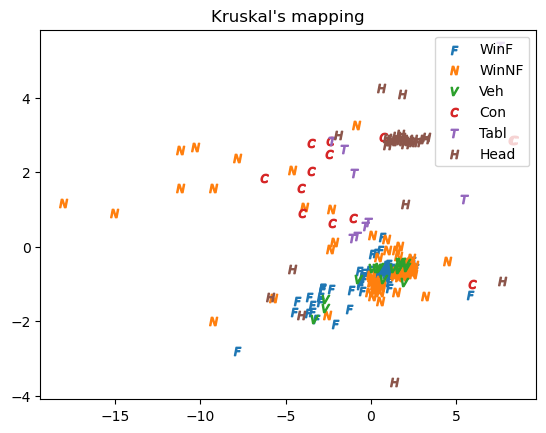

In [14]:
r('library(MASS)')
r('fgl.iso <- isoMDS(dist(as.matrix(fgl[-40, -10])))')
fgl_iso = r('fgl.iso$points')
fgl_target = r('as.numeric(fgl$type)-1')
fgl_target_name = r('levels(fgl$type)')

fgl_iso_df = pd.DataFrame({'x':fgl_iso[:213],'y':fgl_iso[213:]})

markers=['$F$', '$N$', '$V$', '$C$', '$T$', '$H$']
for i, marker in enumerate(markers):
    x_axis_data = fgl_iso_df.loc[np.delete(fgl_target, 39)==i,:]['x']
    y_axis_data = fgl_iso_df.loc[np.delete(fgl_target, 39)==i,:]['y']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=fgl_target_name[i])

plt.legend(loc='upper right')
plt.title("Kruskal's mapping")
plt.show()

### 4) Self-Organizing maps

# pip install sklearn_som
from sklearn_som.som import SOM
lcrabs_som = SOM(m=4, n=1, dim=5)
lcrabs_som.fit(np.array(lcrabs))
predictions = lcrabs_som.predict(np.array(lcrabs))

(나중에)

### 5) Biplots

- **Principal component biplot of the part of the state.x77 data**

In [15]:
## State.x77 data
state = pd.read_csv("../data/state.x77.csv").iloc[:,1:7]
state.index = r('state.abb')

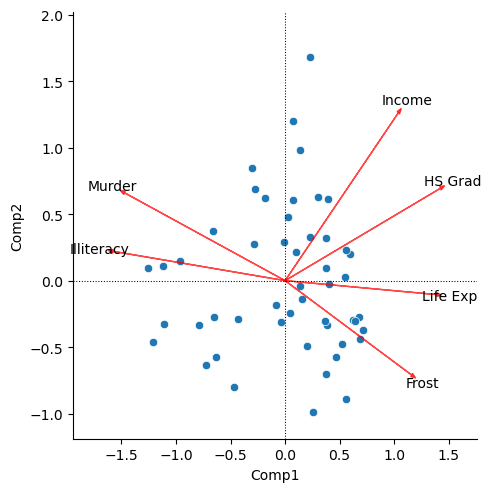

In [16]:
from biplot import eigen_scaling, biplot
from statsmodels.multivariate.pca import PCA

state_pca = PCA(data = state, standardize = True, normalize = True, ncomp = 2)
biplot(pca = state_pca, scaling = 2, plot_loading_labels = True)

### 6) Independent component analysis

- **Boxplots of four ’signals’ recovered by ICA from the crabs data**

In [17]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=4)
crabs_ica = ica.fit_transform(crabs.iloc[:,3:8])

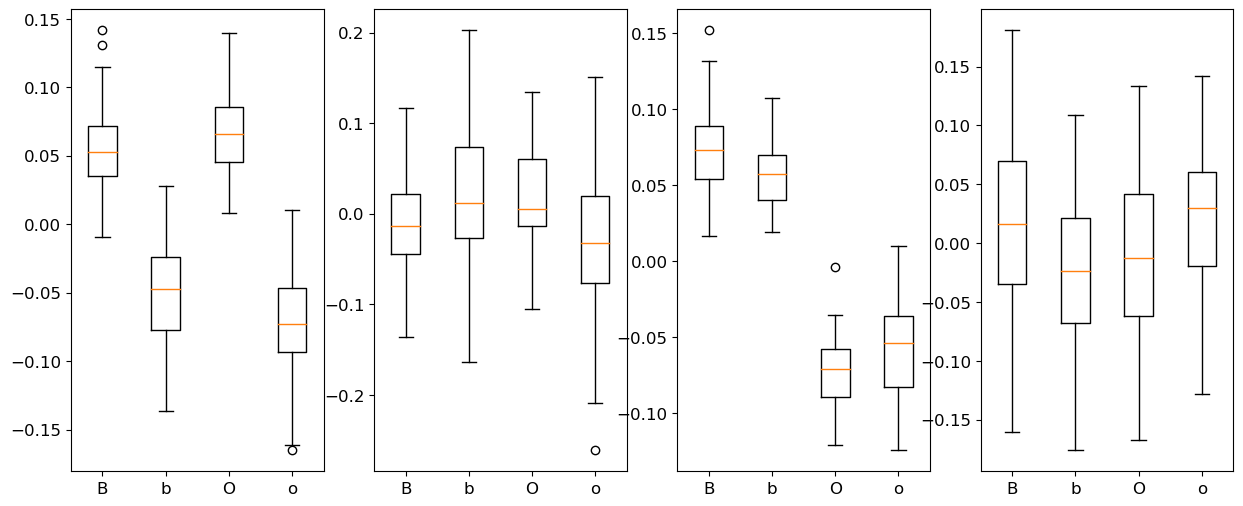

In [18]:
plt.style.use('default')
plt.rcParams['font.size'] = 12
fig,ax=plt.subplots(nrows=1,ncols=4, figsize=(15, 6))

for i in range(4):    
    crabs_ica_df = pd.DataFrame({'B' : crabs_ica[0:50,i],
                                 'b' : crabs_ica[50:100,i],
                                 'O' : crabs_ica[100:150,i],
                                 'o' : crabs_ica[150:200,i]})
    
    ax[i].boxplot(crabs_ica_df)
    ax[i].set_xticklabels(["B","b","O","o"])
    
plt.show()

### 7) Glyph representations

- **stars plot of the state.x77 dataset**

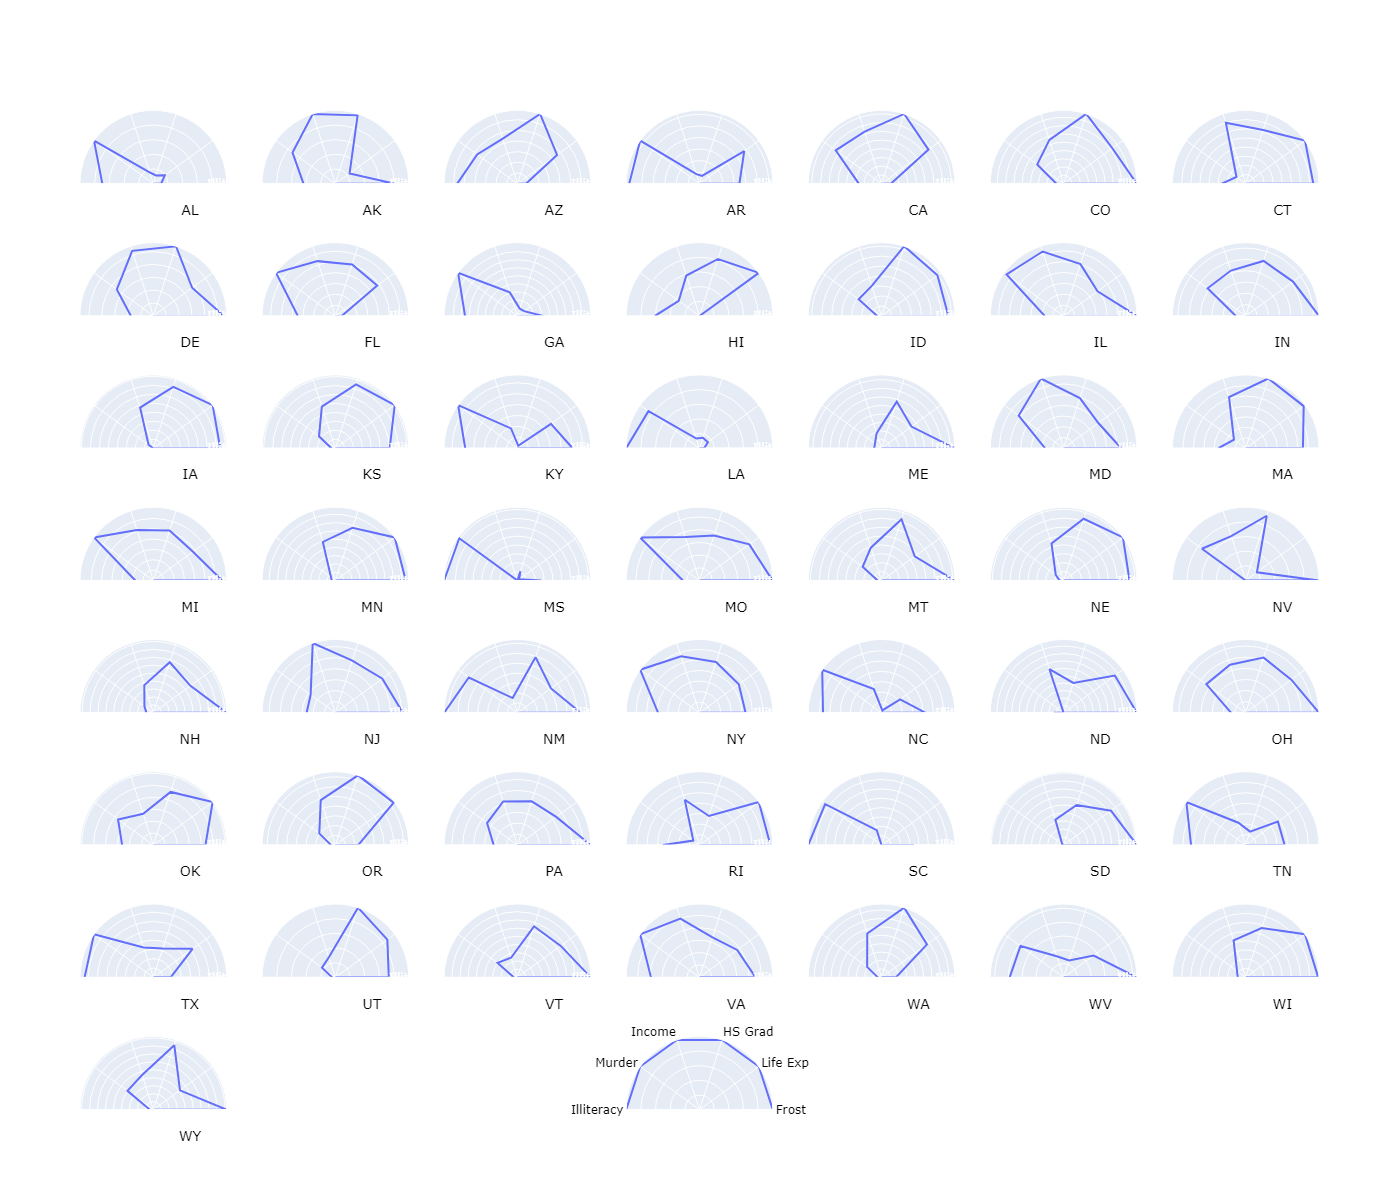

In [19]:
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from plotly.subplots import make_subplots

state_scale = MinMaxScaler().fit_transform(state.iloc[:,[1,3,0,4,2,5]])
state_scale = np.concatenate((state_scale,np.zeros([50,4])), axis = 1)

plt_vars = list(state.iloc[:,[1,3,0,4,2,5]].columns) + ['0','1','2','3']

fig = make_subplots(rows=8, cols=7, shared_xaxes=False, specs=[[{'type':'polar'}]*7]*8, )

figures = []
for i, index in enumerate(state.index):
    figures.append(px.line_polar(state_scale, r = pd.Series(state_scale[i,]),
                                 range_theta=[0,180], start_angle=180,
                                 theta=plt_vars, line_close=True, width = 200, title = index))

for i, figure in enumerate(figures):
    fig.append_trace(figure["data"][0], row=i//7+1, col=i%7+1)

fig.update_layout(height=1200, width=1500)
fig.update_polars(angularaxis={'direction': 'clockwise', 'rotation': -180, 'color':'white'}, sector=[0, 180], radialaxis={'title':{'font':{'color':'black'}}, 'color':'white'})


fig_temp = px.line_polar(state_scale, r = pd.Series([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
                         range_theta=[0,180], start_angle=180,
                         theta=plt_vars, line_close=True, width = 200)
fig.append_trace(fig_temp["data"][0], row=8, col=4)
fig['layout']['polar53']['angularaxis']['color'] = 'black'
for i in range(50):
    fig['layout'][fig['data'][i]['subplot']]['radialaxis']['title']['text'] = state.index[i]
    
fig.show()

### 8) Parallel coordinate plots

- **Parallel coordinates plots of the state.x77 dataset**

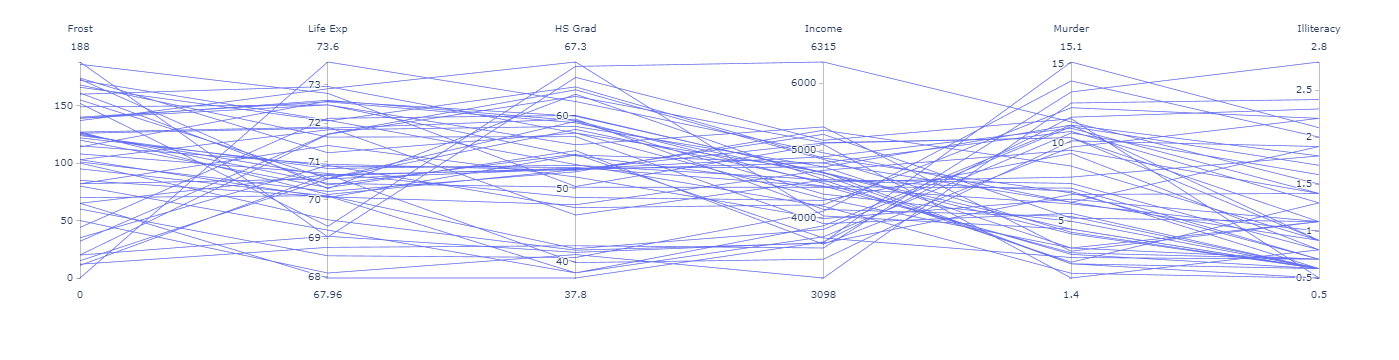

In [20]:
import plotly.express as px
fig = px.parallel_coordinates(state.iloc[:,[5,2,4,0,3,1]], # color = ['black']*50,
                              dimensions=list(state.iloc[:,[5,2,4,0,3,1]].columns))

fig.show()

- **Parallel coordinates plots of the log-transforrned iris data**

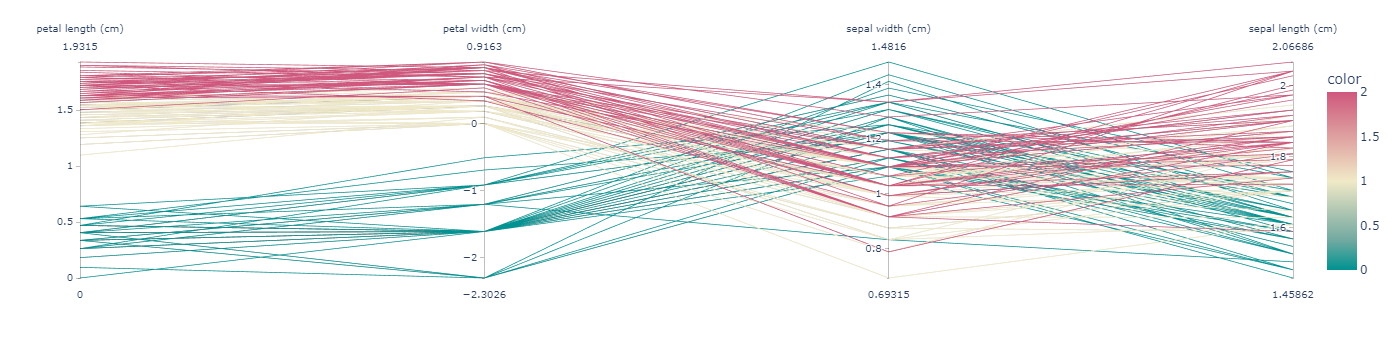

In [21]:
fig = px.parallel_coordinates(np.log(ir).iloc[:,[2,3,1,0]], color = np.array(range(0,150)) // 50,
                              dimensions=list(ir.iloc[:,[2,3,1,0]].columns),
                              color_continuous_scale=px.colors.diverging.Tealrose)

fig.show()

## 11.2 Cluster Analysis

- **Dendograms for the socio-economic data on Swiss provinces by single-link clustering**

In [22]:
swiss_x = pd.read_csv("../data/swiss.csv", index_col=0)

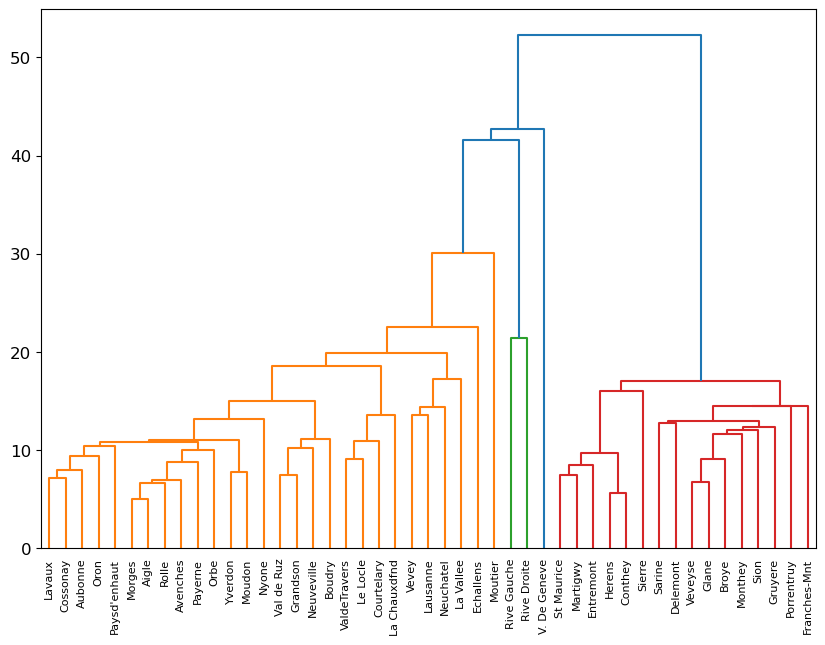

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(swiss_x, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=swiss_x.index, distance_sort='descending', show_leaf_counts=True)
plt.show()

- **Dendograms for the socio-economic data on Swiss provinces by divisive clustering**

In [24]:
# diana

(나중에)

- **First two principal components for the swiss data and labeling by the groups assigned by K-means**

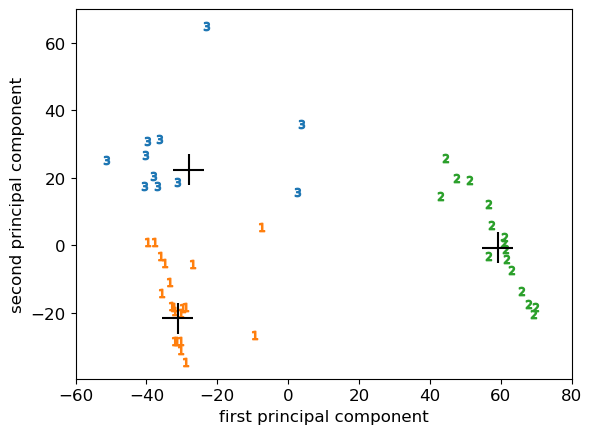

In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

km = KMeans(n_clusters=3, random_state=0)
km.fit(swiss_x)
centers = km.cluster_centers_
pca=PCA(n_components=2)
swiss_pca = pca.fit_transform(swiss_x)

pca_columns=['Comp1','Comp2']
swiss_pca_df = pd.DataFrame(swiss_pca, columns=pca_columns)

markers=['$3$', '$1$', '$2$']
for i, marker in enumerate(markers):
    x_axis_data = swiss_pca_df.loc[km.labels_==i,:]['Comp1']
    y_axis_data = swiss_pca_df.loc[km.labels_==i,:]['Comp2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
    
pca_centers = pca.fit_transform(centers)
plt.scatter(pca_centers[:,0], pca_centers[:,1], [500]*3, marker='+',color='black')

plt.xlabel('first principal component')
plt.xlim(-60, 80)
plt.ylabel('second principal component')
plt.show()

- **First two principal components for the swiss data and labeling by the groups assigned by K-Medoids**

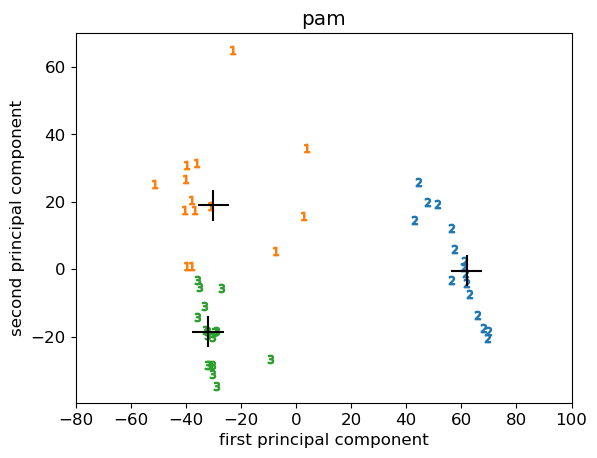

In [26]:
# pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

km = KMedoids(n_clusters=3, random_state=0, method='pam')
km.fit(swiss_x)
centers = km.cluster_centers_
pca=PCA(n_components=2)
swiss_pca = pca.fit_transform(swiss_x)

pca_columns=['Comp1','Comp2']
swiss_pca_df = pd.DataFrame(swiss_pca, columns=pca_columns)

markers=['$2$', '$1$', '$3$']
for i, marker in enumerate(markers):
    x_axis_data = swiss_pca_df.loc[km.labels_==i,:]['Comp1']
    y_axis_data = swiss_pca_df.loc[km.labels_==i,:]['Comp2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
    
pca_centers = pca.fit_transform(centers)
plt.scatter(pca_centers[:,0], pca_centers[:,1], [500]*3, marker='+',color='black')

plt.xlabel('first principal component')
plt.xlim(-80, 100)
plt.ylabel('second principal component')
plt.title('pam')
plt.show()

## 11.3 Factor Analysis

In [27]:
ability_cov = pd.read_csv("../data/ability.cov.csv", index_col=0)

def correlation_from_covariance(covariance):
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation

ability_corr = correlation_from_covariance(ability_cov)

In [28]:
# pip install factor-analyzer
from factor_analyzer import FactorAnalyzer, Rotator

fa = FactorAnalyzer(is_corr_matrix=True, rotation='varimax', method='ml', n_factors=2)
fa.fit(ability_corr)

FactorAnalyzer(is_corr_matrix=True, method='ml', n_factors=2,
               rotation='varimax', rotation_kwargs={})

In [29]:
np.round(fa.get_uniquenesses(), 3)

array([0.455, 0.589, 0.218, 0.769, 0.052, 0.334])

In [30]:
L = fa.loadings_
np.round(fa.loadings_, 4)

array([[0.4994, 0.5434],
       [0.1561, 0.6215],
       [0.2058, 0.8599],
       [0.1085, 0.4678],
       [0.9562, 0.1821],
       [0.7848, 0.2248]])

In [31]:
np.round(fa.loadings_.dot(fa.loadings_.T) + np.diag(fa.get_uniquenesses()), 3)

array([[1.   , 0.416, 0.57 , 0.308, 0.577, 0.514],
       [0.416, 1.   , 0.567, 0.308, 0.262, 0.262],
       [0.57 , 0.567, 1.   , 0.425, 0.353, 0.355],
       [0.308, 0.308, 0.425, 1.   , 0.189, 0.19 ],
       [0.577, 0.262, 0.353, 0.189, 1.   , 0.791],
       [0.514, 0.262, 0.355, 0.19 , 0.791, 1.   ]])

In [32]:
rotator = Rotator(method='oblimin')
rotator.fit(fa.loadings_)

Rotator(method='oblimin')

In [33]:
list(ability_cov.columns)

['general', 'picture', 'blocks', 'maze', 'reading', 'vocab']

(-0.1, 1.1)

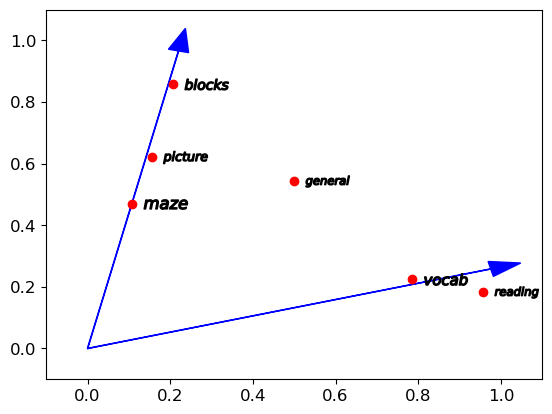

In [34]:
markers = ['$general$', '$picture$', '$blocks$', '$maze$', '$reading$', '$vocab$']

plt.arrow(0, 0, rotator.rotation_[0,0], rotator.rotation_[0,1], head_width=0.05, color='blue')
plt.arrow(0, 0, rotator.rotation_[1,0], rotator.rotation_[1,1], head_width=0.05, color='blue')
plt.scatter(fa.loadings_[:,0], fa.loadings_[:,1], color='red')
for i, marker in enumerate(markers):
    plt.scatter(fa.loadings_[i,0]+0.08, fa.loadings_[i,1], [1000], marker=marker, color='black')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

## 11.4 Discrete multivariate analysis

- **Mosaic Plot**

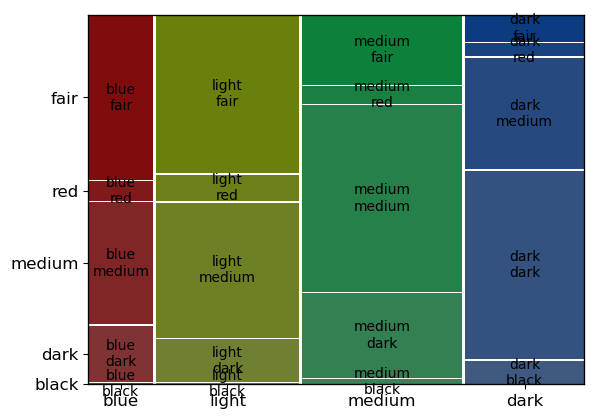

In [35]:
caith = pd.read_csv("../data/caith.csv", index_col=0)

caith_dict = {}
caith_columns = list(caith.columns)
caith_index = list(caith.index)
for i in range(20):
    caith_dict[(caith_index[i//5], caith_columns[4-i%5])] = caith.iloc[i//5, 4-i%5]
    
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

mosaic(caith_dict)
plt.show()

In [100]:
caith

Hair color  fair  red  medium  dark  black
Eye color                                 
blue         326   38     241   110      3
light        688  116     584   188      4
medium       343   84     909   412     26
dark          98   48     403   681     85

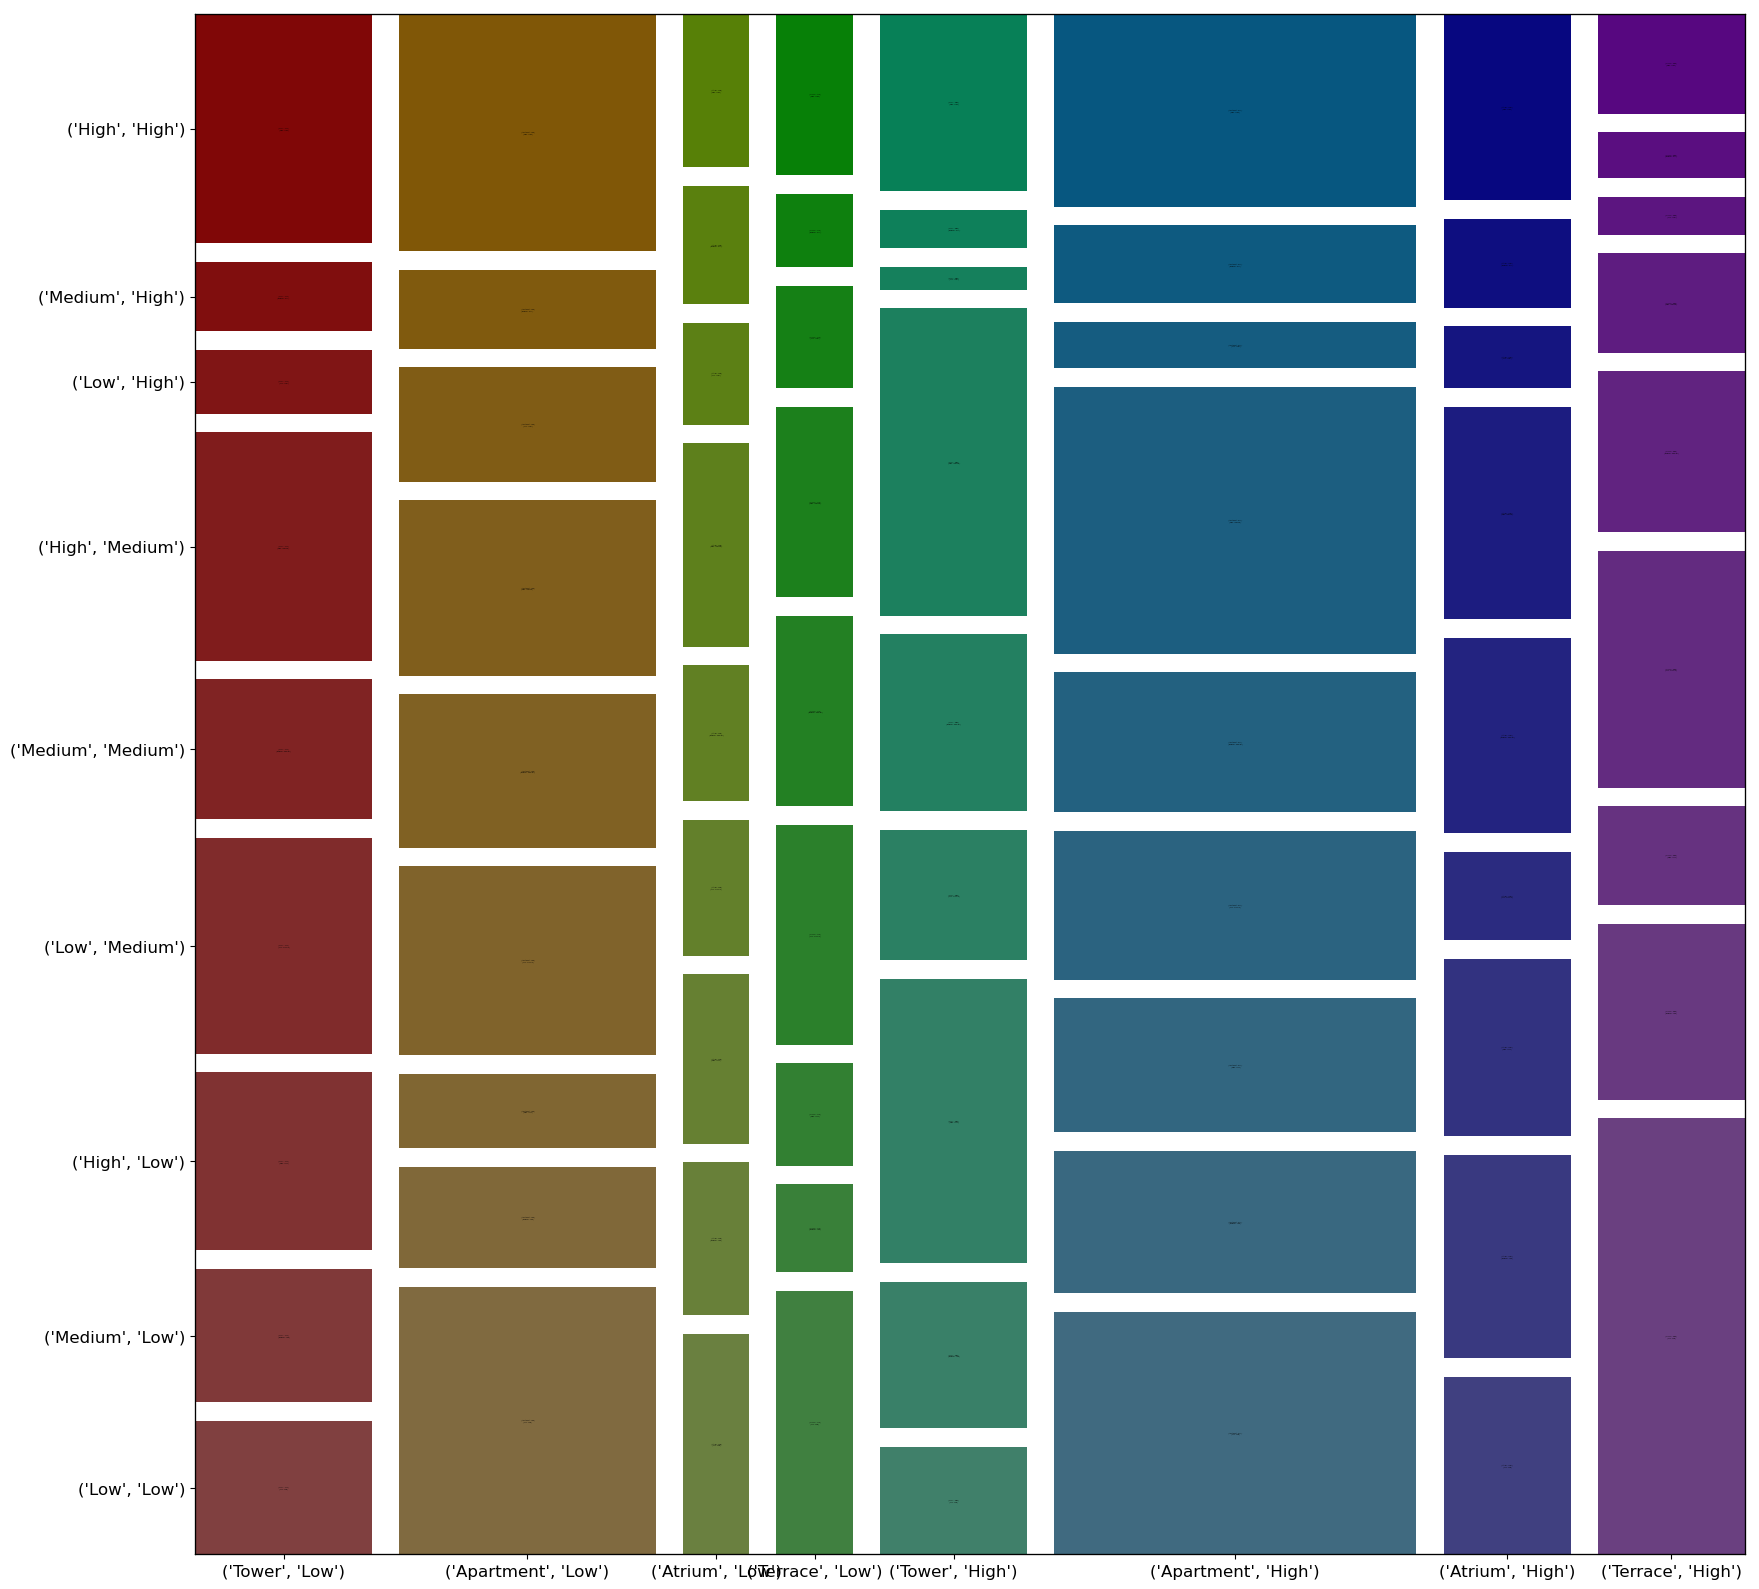

In [37]:
housing = pd.read_csv("../data/housing.csv")

housing_dict = {}
housing_sat = ['Low','Medium','High']
housing_infl = ['Low','Medium','High']
housing_type = ['Tower','Apartment','Atrium','Terrace']
housing_cont = ['Low', 'High']
for i in range(72):
    housing_dict[((housing_type[(i//9)%4], housing_cont[(i//36)%2]), (housing_sat[i%3], housing_infl[(i//3)%3]))] = housing.iloc[i, 4]    
    
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

mosaic(housing_dict, gap = 0.02)
plt.rcParams["figure.figsize"]=(20, 20)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('font', size=0.1)          # controls default text sizes

In [58]:
# pip install prince
from prince import CA

ca = CA(n_components=2, n_iter=3).fit(caith)
ca.col_masses_

fair      0.270095
red       0.053091
medium    0.396696
dark      0.258214
black     0.021905
dtype: float64

In [105]:
row_coord

0         1
blue   -0.400300  0.165411
light  -0.440708  0.088463
medium  0.033614 -0.245002
dark    0.702739  0.133914

In [104]:
col_coord

0         1
fair   -0.543995  0.173844
red    -0.233261  0.048279
medium -0.042024 -0.208304
dark    0.588709  0.103950
black   1.094388  0.286437

(-0.7, 1.2)

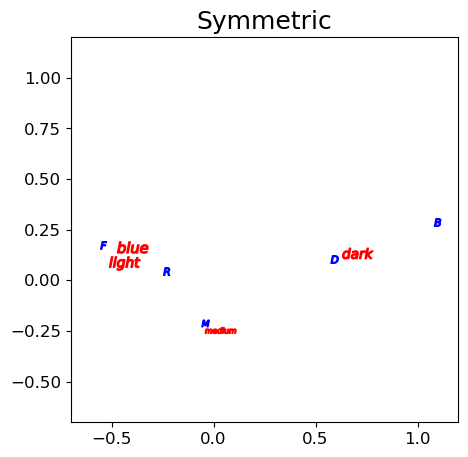

In [103]:
row_coord = ca.row_coordinates(caith)
row_coord.loc[:,1] = -row_coord.loc[:,1]
col_coord = ca.column_coordinates(caith)
col_coord.loc[:,1] = -col_coord.loc[:,1]

plt.rcParams["figure.figsize"]=(5, 5)
for i, marker in enumerate(['$blue$','$light$','$medium$','$dark$']):
    plt.scatter(row_coord.iloc[i,0], row_coord.iloc[i,1], 500, marker=marker, color='red')

for i, marker in enumerate(['$F$','$R$','$M$','$D$','$B$']):
    plt.scatter(col_coord.iloc[i,0], col_coord.iloc[i,1], 30, marker=marker, color='blue')
    
plt.title('Symmetric')
plt.xlim(-0.7, 1.2)
plt.ylim(-0.7, 1.2)

(-1.4, 2.4)

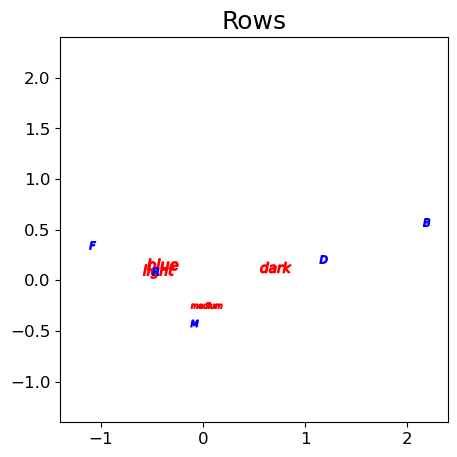

In [101]:
row_coord = ca.row_coordinates(caith)
row_coord.loc[:,1] = -row_coord.loc[:,1]
col_coord = ca.column_coordinates(caith)
col_coord.loc[:,1] = -col_coord.loc[:,1]
col_coord = col_coord*2

plt.rcParams["figure.figsize"]=(5, 5)
for i, marker in enumerate(['$blue$','$light$','$medium$','$dark$']):
    plt.scatter(row_coord.iloc[i,0], row_coord.iloc[i,1], 500, marker=marker, color='red')

for i, marker in enumerate(['$F$','$R$','$M$','$D$','$B$']):
    plt.scatter(col_coord.iloc[i,0], col_coord.iloc[i,1], 30, marker=marker, color='blue')
    
plt.title('Rows')
plt.xlim(-0.7*2, 1.2*2)
plt.ylim(-0.7*2, 1.2*2)

In [39]:
caith.index.rename('Eye color', inplace=True)
caith.columns.rename('Hair color', inplace=True)

In [56]:
ca = CA(n_components=2)

In [57]:
ca = ca.fit(caith)
ca.row_coordinates(caith)

0         1
blue   -0.400300 -0.165411
light  -0.440708 -0.088463
medium  0.033614  0.245002
dark    0.702739 -0.133914

In [42]:
ca.V_

array([[-0.63337328, -0.12040878, -0.05929716,  0.67018848,  0.36286535],
       [-0.52087214, -0.0641327 ,  0.75637821, -0.30452895, -0.24440403]])

<AxesSubplot:title={'center':'Principal coordinates'}, xlabel='Component 0 (86.56% inertia)', ylabel='Component 1 (13.07% inertia)'>

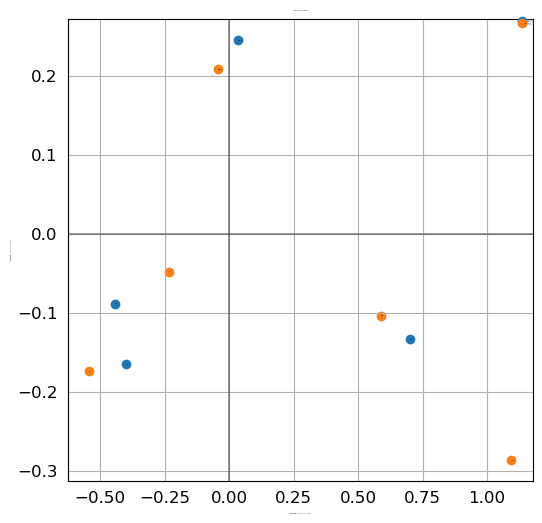

In [43]:
ca.plot_coordinates(X=caith)

In [45]:
from sklearn.cross_decomposition import CCA

ca = CCA(n_components=2).fit(caith, caith)

In [46]:
ca.x_loadings_

array([[ 6.92632899e-01,  3.44947968e-16],
       [ 5.77152982e-01,  4.42553429e-01],
       [ 1.79893929e-01,  6.22992218e-01],
       [-4.91141567e-01,  5.29532150e-01],
       [-5.40942325e-01,  3.81159734e-01]])

In [110]:
from prince import MCA

farms = pd.read_csv("../data/farms.csv")

In [119]:
farms

Mois Manag Use Manure
0    M1    SF  U2     C4
1    M1    BF  U2     C2
2    M2    SF  U2     C4
3    M2    SF  U2     C4
4    M1    HF  U1     C2
5    M1    HF  U2     C2
6    M1    HF  U3     C3
7    M5    HF  U3     C3
8    M4    HF  U1     C1
9    M2    BF  U1     C1
10   M1    BF  U3     C1
11   M4    SF  U2     C2
12   M5    SF  U2     C3
13   M5    NM  U3     C0
14   M5    NM  U2     C0
15   M5    SF  U3     C3
16   M2    NM  U1     C0
17   M1    NM  U1     C0
18   M5    NM  U1     C0
19   M5    NM  U1     C0

In [111]:
farms_mca = MCA().fit(farms)

In [117]:
farms_mca.column_coordinates(farms)

0         1
Mois_M1   -0.385139 -0.637188
Mois_M2   -0.416153  0.826946
Mois_M4   -0.710678 -0.763249
Mois_M5    0.825992  0.382719
Manag_BF  -0.466113 -1.118426
Manag_HF  -0.222029 -1.045025
Manag_NM   1.335792  0.473720
Manag_SF  -0.917711  0.956347
Use_U1     0.702748 -0.287179
Use_U2    -0.793974  0.577396
Use_U3     0.286512 -0.521783
Manure_C0  1.335792  0.473720
Manure_C1 -0.203004 -1.352005
Manure_C2 -0.839729 -0.713055
Manure_C3 -0.018923 -0.134000
Manure_C4 -1.323711  1.533971

In [118]:
farms_mca.row_coordinates(farms)

0         1
0  -1.060730  0.815488
1  -0.770601 -0.634558
2  -1.070348  1.306732
3  -1.070348  1.306732
4  -0.230765 -0.900012
5  -0.694909 -0.609931
6  -0.105305 -0.784442
7   0.270274 -0.442244
8  -0.134265 -1.156688
9  -0.118623 -0.647775
10 -0.238083 -1.217734
11 -1.011596  0.019272
12 -0.280527  0.598050
13  1.173470  0.271226
14  0.838404  0.640021
15  0.054539  0.229255
16  0.917350  0.498986
17  0.926968  0.007741
18  1.302548  0.349940
19  1.302548  0.349940